<a href="https://colab.research.google.com/github/ankitg-02/kaggle-diet-analysis/blob/main/Diet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'/content/weight_change_dataset.csv')
diet_df=pd.DataFrame(data)
diet_df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [3]:
diet_df.shape

(100, 13)

In [4]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [5]:
for i in diet_df.columns:
  print(f'{i}:')
  print(diet_df[i].unique())
  print(diet_df[i].value_counts())
  print('\n')

Participant ID:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Participant ID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


Age:
[56 46 32 25 38 36 40 28 41 53 57 20 39 19 47 55 50 29 42 44 59 45 33 54
 24 26 35 21 31 43 37 52 34 23 51 27 48 58 18 22]
Age
41    6
25    5
56    4
42    4
32    4
38    4
31    4
24    4
19    4
52    3
43    3
21    3
35    3
26    3
45    3
46    3
59    3
28    3
57    3
53    3
34    2
18    2
58    2
33    2
39    2
20    2
50    2
40    2
48    1
27    1
51    1
23    1
29    1
36    1
37    1
54    1
47

In [6]:
diet_df.describe(include='all')

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,Lightly Active,Poor,NaN,NaN
freq,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,31,38,NaN,NaN
mean,50.500000,37.910000,NaN,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,NaN,NaN,4.810000,168.750000
std,29.011492,12.219454,NaN,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,NaN,NaN,2.576879,30.588004
min,1.000000,18.000000,NaN,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,NaN,NaN,1.000000,98.200000
25%,25.750000,26.750000,NaN,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,NaN,NaN,2.750000,149.550000
50%,50.500000,38.000000,NaN,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,NaN,NaN,5.000000,169.800000
75%,75.250000,46.250000,NaN,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,NaN,NaN,7.000000,188.300000


Age:


maximum value of Age is 59
mean value of Age is 37.91
minimum value of Age is 18




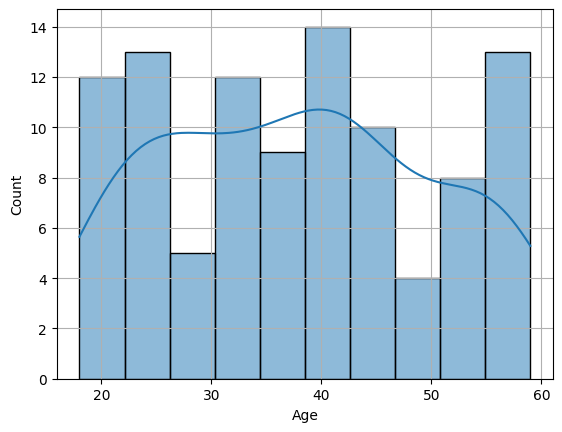



lower bound of Age is -2.5
upper bound of Age is 75.5


Gender:


maximum number of Gender is 57
minimum number of Gender is 43


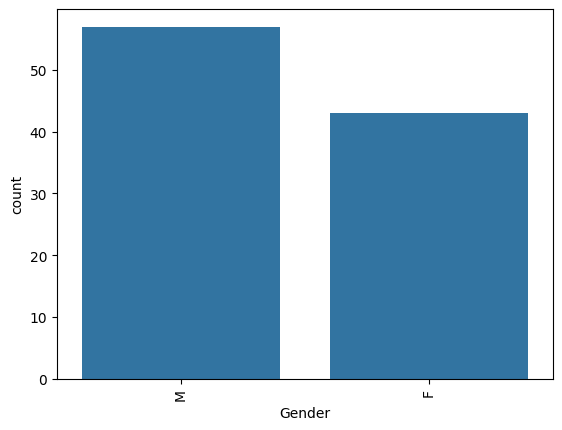



Current Weight (lbs):


maximum value of Current Weight (lbs) is 238.2
mean value of Current Weight (lbs) is 171.533
minimum value of Current Weight (lbs) is 100.0


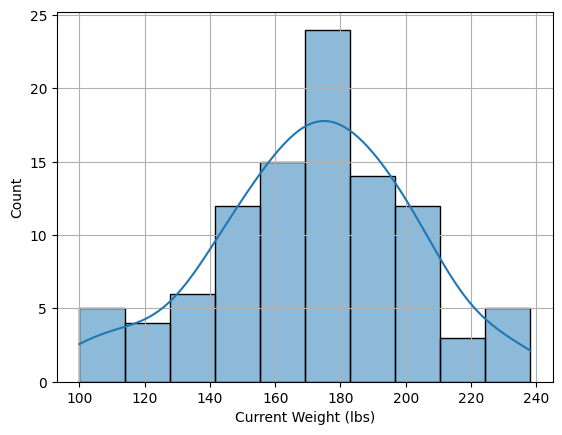



lower bound of Current Weight (lbs) is 95.41249999999998
upper bound of Current Weight (lbs) is 250.71250000000003


BMR (Calories):


maximum value of BMR (Calories) is 3390.8
mean value of BMR (Calories) is 2518.206
minimum value of BMR (Calories) is 1566.5


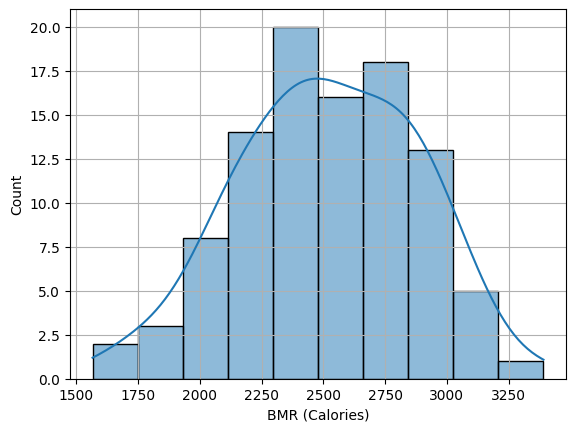



lower bound of BMR (Calories) is 1428.6625000000006
upper bound of BMR (Calories) is 3632.3624999999993


Daily Calories Consumed:


maximum value of Daily Calories Consumed is 4000.0
mean value of Daily Calories Consumed is 3518.292
minimum value of Daily Calories Consumed is 2030.9


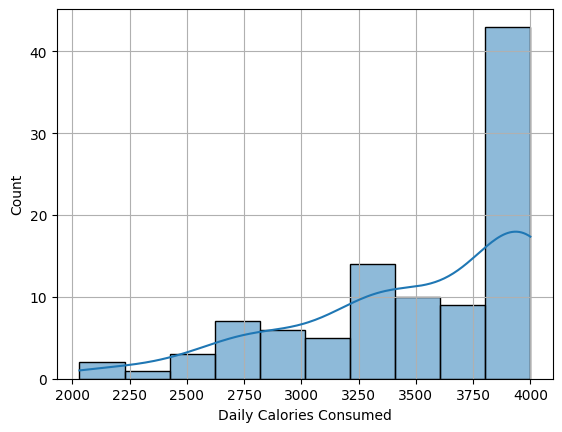



lower bound of Daily Calories Consumed is 2083.2500000000005
upper bound of Daily Calories Consumed is 5150.049999999999


Daily Caloric Surplus/Deficit:


maximum value of Daily Caloric Surplus/Deficit is 1922.5
mean value of Daily Caloric Surplus/Deficit is 1000.091
minimum value of Daily Caloric Surplus/Deficit is 82.5


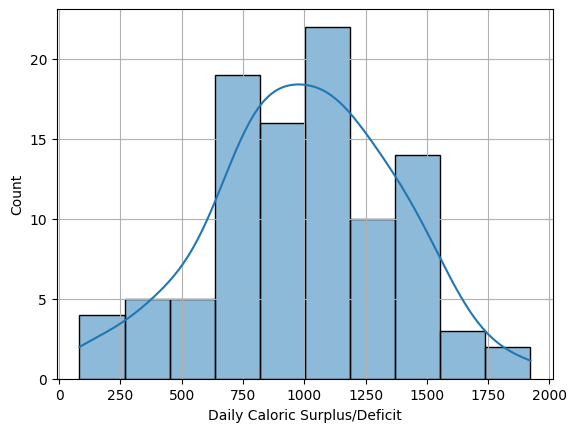



lower bound of Daily Caloric Surplus/Deficit is 37.387500000000045
upper bound of Daily Caloric Surplus/Deficit is 1982.8875


Weight Change (lbs):


maximum value of Weight Change (lbs) is 5.0
mean value of Weight Change (lbs) is -2.779816776501477
minimum value of Weight Change (lbs) is -35.67811526793611


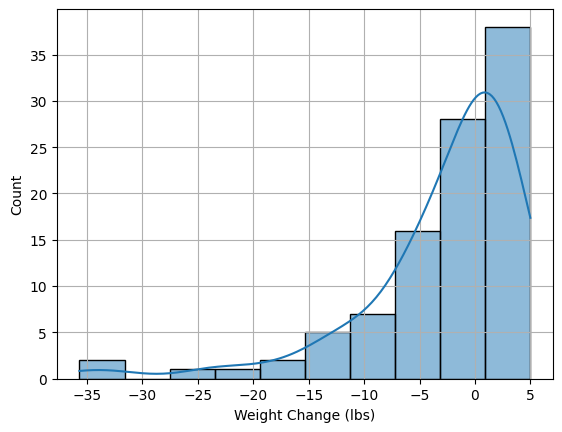



lower bound of Weight Change (lbs) is -15.305778970585486
upper bound of Weight Change (lbs) is 12.143467382351291


Duration (weeks):


maximum value of Duration (weeks) is 12
mean value of Duration (weeks) is 6.92
minimum value of Duration (weeks) is 1




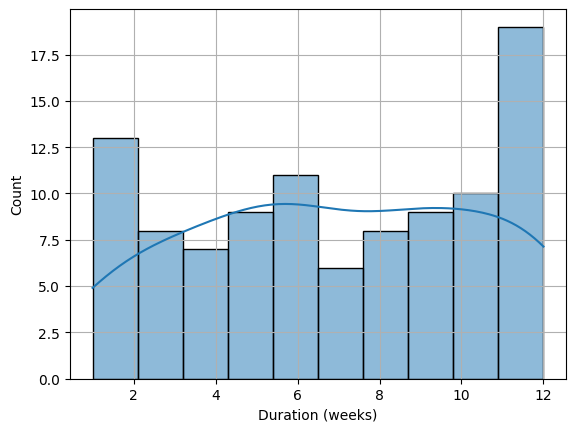



lower bound of Duration (weeks) is -5.0
upper bound of Duration (weeks) is 19.0


Physical Activity Level:


maximum number of Physical Activity Level is 31
minimum number of Physical Activity Level is 21


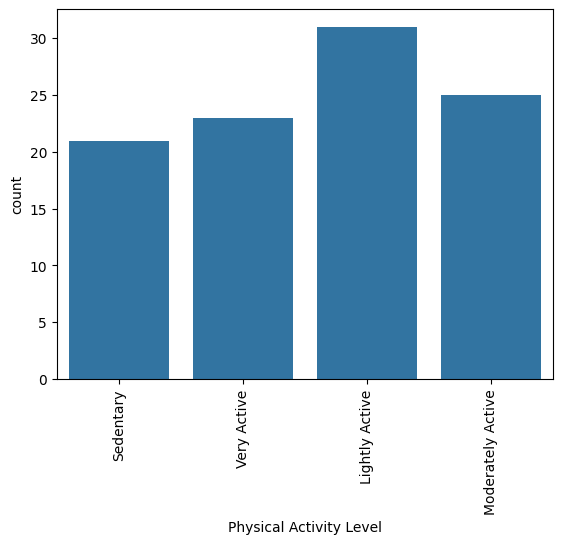



Sleep Quality:


maximum number of Sleep Quality is 38
minimum number of Sleep Quality is 16


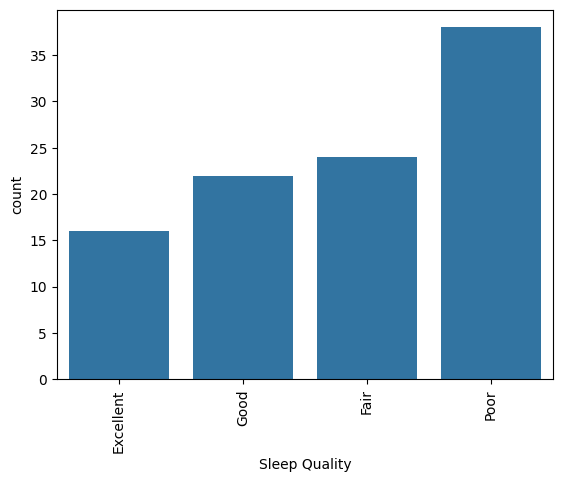



Stress Level:


maximum value of Stress Level is 9
mean value of Stress Level is 4.81
minimum value of Stress Level is 1




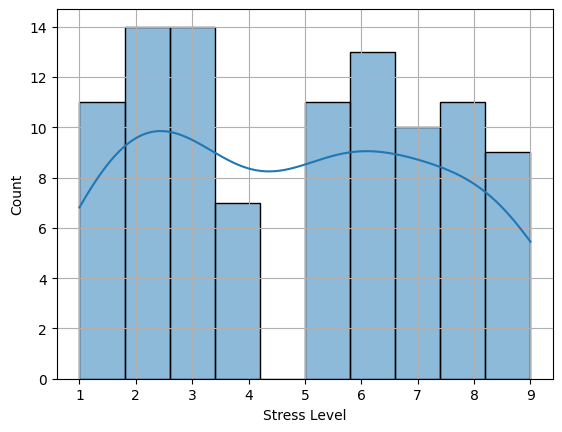



lower bound of Stress Level is -3.625
upper bound of Stress Level is 13.375


Final Weight (lbs):


maximum value of Final Weight (lbs) is 232.5
mean value of Final Weight (lbs) is 168.75000000000003
minimum value of Final Weight (lbs) is 98.2


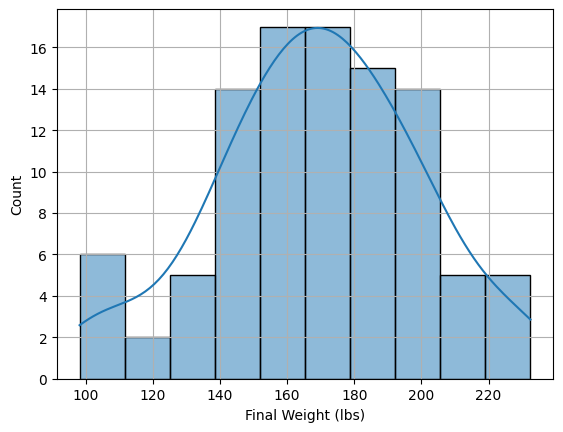



lower bound of Final Weight (lbs) is 91.42500000000001
upper bound of Final Weight (lbs) is 246.425




In [7]:
for i in diet_df.columns[1:]:
  if diet_df[i].dtype=='object':
    print(f'{i}:')
    print('\n')
    print(f'maximum number of {i} is {diet_df[i].value_counts().max()}')
    print(f'minimum number of {i} is {diet_df[i].value_counts().min()}')
    sns.countplot(x=diet_df[i])
    plt.xticks(rotation=90)
    plt.show()
    print('\n')
  if diet_df[i].dtype=='float64':
    print(f'{i}:')
    print('\n')
    print(f'maximum value of {i} is {diet_df[i].max()}')
    print(f'mean value of {i} is {diet_df[i].mean()}')
    print(f'minimum value of {i} is {diet_df[i].min()}')
    sns.histplot(diet_df[i],kde=True,bins=10)
    plt.grid(True)
    plt.show()
    print('\n')
    q1=diet_df[i].quantile(0.25)
    q3=diet_df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    print(f'lower bound of {i} is {lower_bound}')
    print(f'upper bound of {i} is {upper_bound}')
    print('\n')
  if diet_df[i].dtype=='int64':
    print(f'{i}:')
    print('\n')
    print(f'maximum value of {i} is {diet_df[i].max()}')
    print(f'mean value of {i} is {diet_df[i].mean()}')
    print(f'minimum value of {i} is {diet_df[i].min()}')
    print('\n')
    sns.histplot(diet_df[i],kde=True,bins=10)
    plt.grid(True)
    plt.show()
    print('\n')
    q1=diet_df[i].quantile(0.25)
    q3=diet_df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    print(f'lower bound of {i} is {lower_bound}')
    print(f'upper bound of {i} is {upper_bound}')
    print('\n')

In [8]:
updated_data = diet_df[
    (diet_df['Age'] <= 0) & (diet_df['Age'] >= 75.5) &
    (diet_df['Current Weight (lbs)'] >= 95.41249999999998) & (diet_df['Current Weight (lbs)'] <= 250.71250000000003) &
    (diet_df['BMR (Calories)'] >= 1428.6625000000006) & (diet_df['BMR (Calories)'] <= 3632.3624999999993) &
    (diet_df['Daily Calories Consumed'] >= 2083.2500000000005) & (diet_df['Daily Calories Consumed'] <= 5150.049999999999) &
    (diet_df['Daily Caloric Surplus/Deficit'] >= 37.387500000000045) & (diet_df['Daily Caloric Surplus/Deficit'] <= 1982.8875) &
    (diet_df['Weight Change (lbs)'] >= -15.305778970585486) & (diet_df['Weight Change (lbs)'] <= 12.143467382351291) &
    (diet_df['Duration (weeks)'] >= 0) & (diet_df['Duration (weeks)'] <= 19.0) &
    (diet_df['Stress Level'] >= 1) & (diet_df['Stress Level'] <= 13.375)
]

In [9]:
modified_data1=diet_df

In [10]:
modified_data1.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [11]:
modified_data1=modified_data1[
    (modified_data1['Age'] >= 0) & (modified_data1['Age'] <= 75.5) &
    (modified_data1['Current Weight (lbs)'] >= 95.41249999999998) & (modified_data1['Current Weight (lbs)'] <= 250.71250000000003) &
    (modified_data1['BMR (Calories)'] >= 1428.6625000000006) & (modified_data1['BMR (Calories)'] <= 3632.3624999999993) &
    (modified_data1['Daily Calories Consumed'] >= 2083.2500000000005) & (modified_data1['Daily Calories Consumed'] <= 5150.049999999999) &
    (modified_data1['Daily Caloric Surplus/Deficit'] >= 37.387500000000045) & (modified_data1['Daily Caloric Surplus/Deficit'] <= 1982.8875) &
    (modified_data1['Weight Change (lbs)'] >= -15.305778970585486) & (modified_data1['Weight Change (lbs)'] <= 12.143467382351291) &
    (modified_data1['Duration (weeks)'] >= 0) & (modified_data1['Duration (weeks)'] <= 19.0) &
    (modified_data1['Stress Level'] >= 1) & (modified_data1['Stress Level'] <= 13.375)
]

In [12]:
modified_data1.shape

(93, 13)

In [13]:
s=StandardScaler()
oe=OrdinalEncoder()
for i in modified_data1.columns[1:12]:
  if modified_data1[i].dtype=='object':
    modified_data1[i]=oe.fit_transform(modified_data1[[i]])
  if modified_data1[i].dtype=='float64':
    modified_data1[i]=s.fit_transform(modified_data1[[i]])
  if modified_data1[i].dtype=='int64':
    modified_data1[i]=s.fit_transform(modified_data1[[i]])

In [14]:
x=modified_data1.drop(columns=['Participant ID','Final Weight (lbs)'],axis=1)
y=modified_data1['Final Weight (lbs)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

r2 score of linear regression is 0.9999992895832499
mean absolute error of linear regression is 0.0200792847345407
mean squared error of linear regression is 0.0006991435579815107
root mean squared error of linear regression is 0.026441322924194065
accuracy of linear regression is 0.9999992895832499


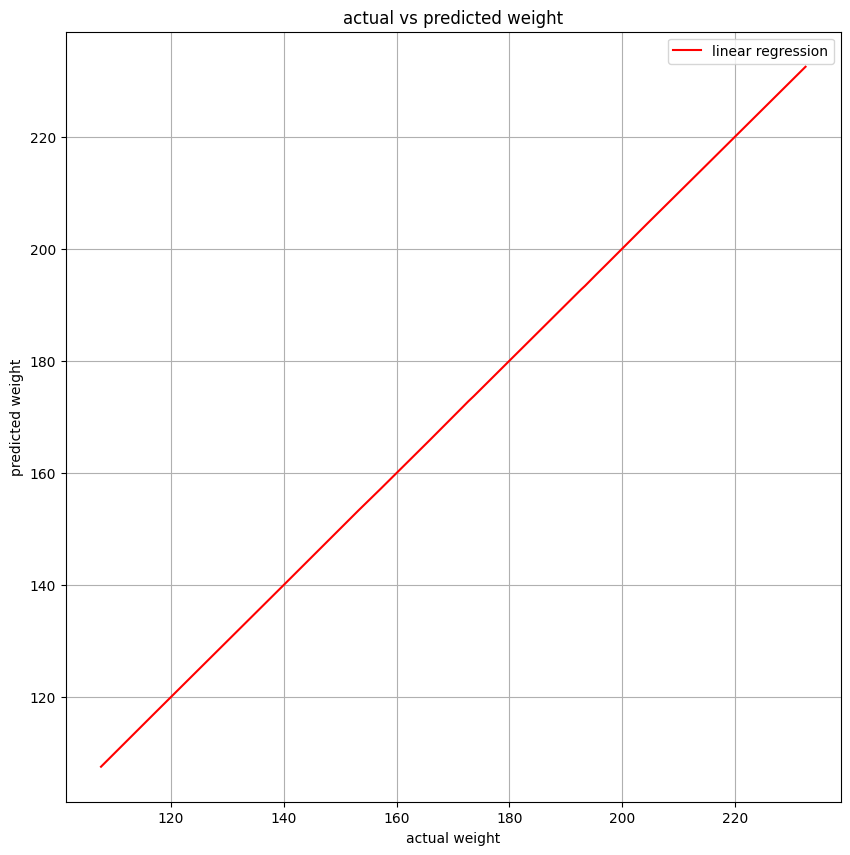

In [43]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(f'r2 score of linear regression is {r2_score(y_test,y_pred)}')
print(f'mean absolute error of linear regression is {mean_absolute_error(y_test,y_pred)}')
print(f'mean squared error of linear regression is {mean_squared_error(y_test,y_pred)}')
print(f'root mean squared error of linear regression is {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'accuracy of linear regression is {lr.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred,ci=None,color='red')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['linear regression'])
plt.grid(True)
plt.show()

r2 score of lasso is 0.997963868503879
mean absolute error of lasso is 1.0930539069514424
mean squared error of lasso is 2.0038213042220554
root mean squared error of lasso is 1.4155639527135662
accuracy of lasso is 0.997963868503879


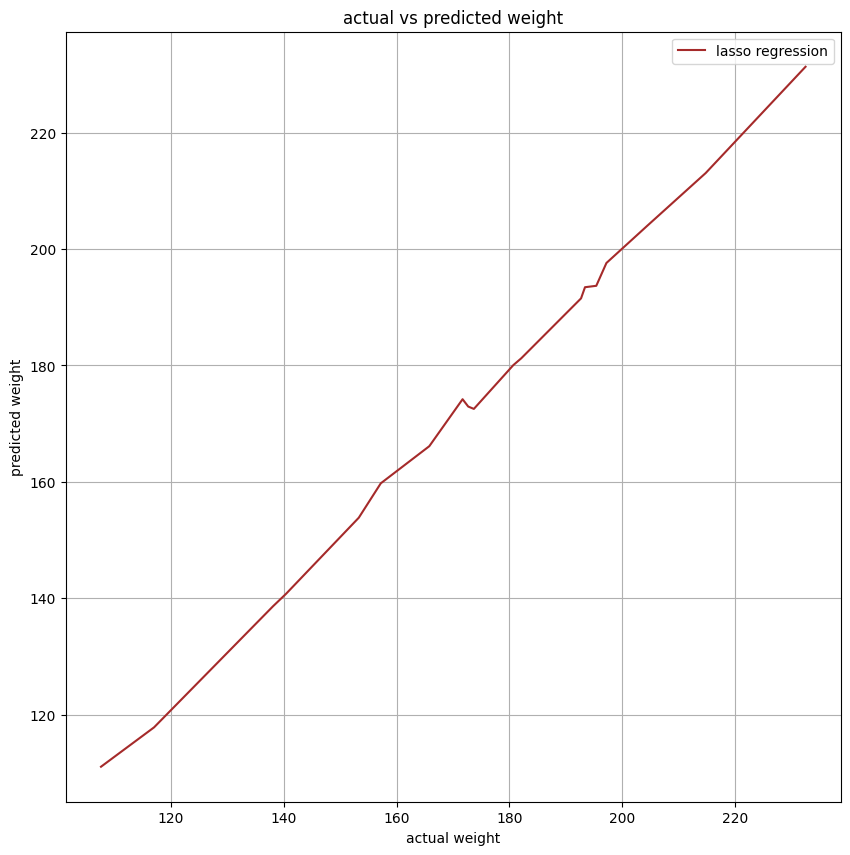

In [42]:
l=Lasso()
l.fit(x_train,y_train)
y_pred1=l.predict(x_test)
print(f'r2 score of lasso is {r2_score(y_test,y_pred1)}')
print(f'mean absolute error of lasso is {mean_absolute_error(y_test,y_pred1)}')
print(f'mean squared error of lasso is {mean_squared_error(y_test,y_pred1)}')
print(f'root mean squared error of lasso is {np.sqrt(mean_squared_error(y_test,y_pred1))}')
print(f'accuracy of lasso is {l.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred1,ci=None,color='brown')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['lasso regression'])
plt.grid(True)
plt.show()

r2 score of ridge is 0.99992729018963
mean absolute error of ridge is 0.22156265762983796
mean squared error of ridge is 0.0715560204843972
root mean squared error of ridge is 0.2674995709985293
accuracy of ridge is 0.99992729018963


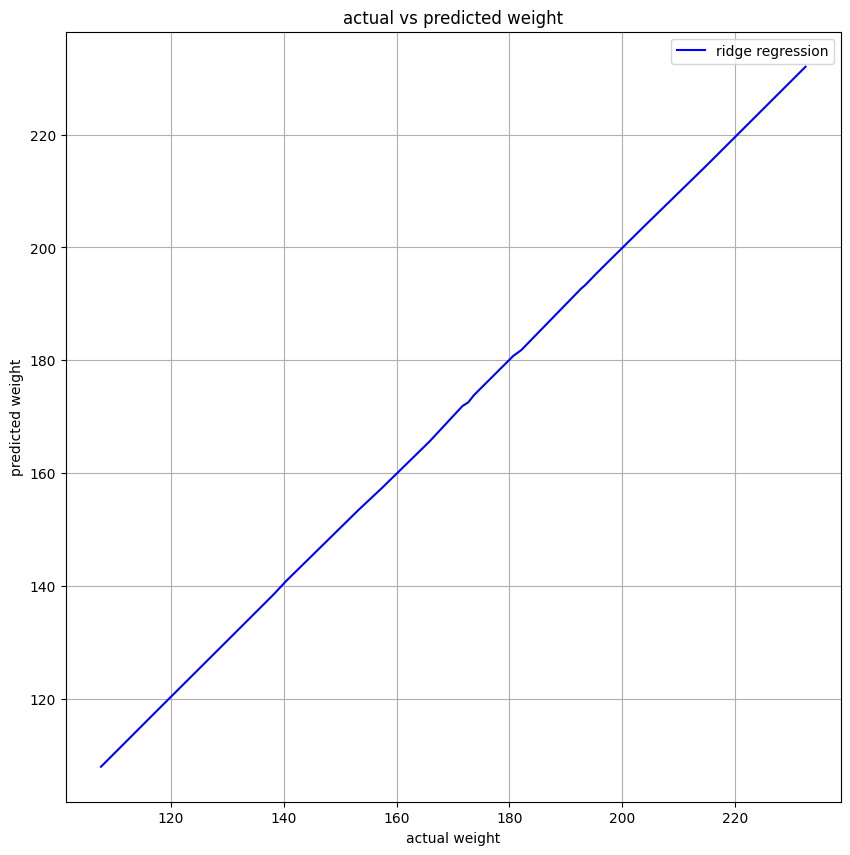

In [41]:
r=Ridge()
r.fit(x_train,y_train)
y_pred2=r.predict(x_test)
print(f'r2 score of ridge is {r2_score(y_test,y_pred2)}')
print(f'mean absolute error of ridge is {mean_absolute_error(y_test,y_pred2)}')
print(f'mean squared error of ridge is {mean_squared_error(y_test,y_pred2)}')
print(f'root mean squared error of ridge is {np.sqrt(mean_squared_error(y_test,y_pred2))}')
print(f'accuracy of ridge is {r.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred2,ci=None,color='blue')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['ridge regression'])
plt.grid(True)
plt.show()

r2 score of elastic net is 0.9440545812185844
mean absolute error of elastic net is 5.984218654245645
mean squared error of elastic net is 55.05765332022628
root mean squared error of elastic net is 7.420084455060217
accuracy of elastic net is 0.9440545812185844


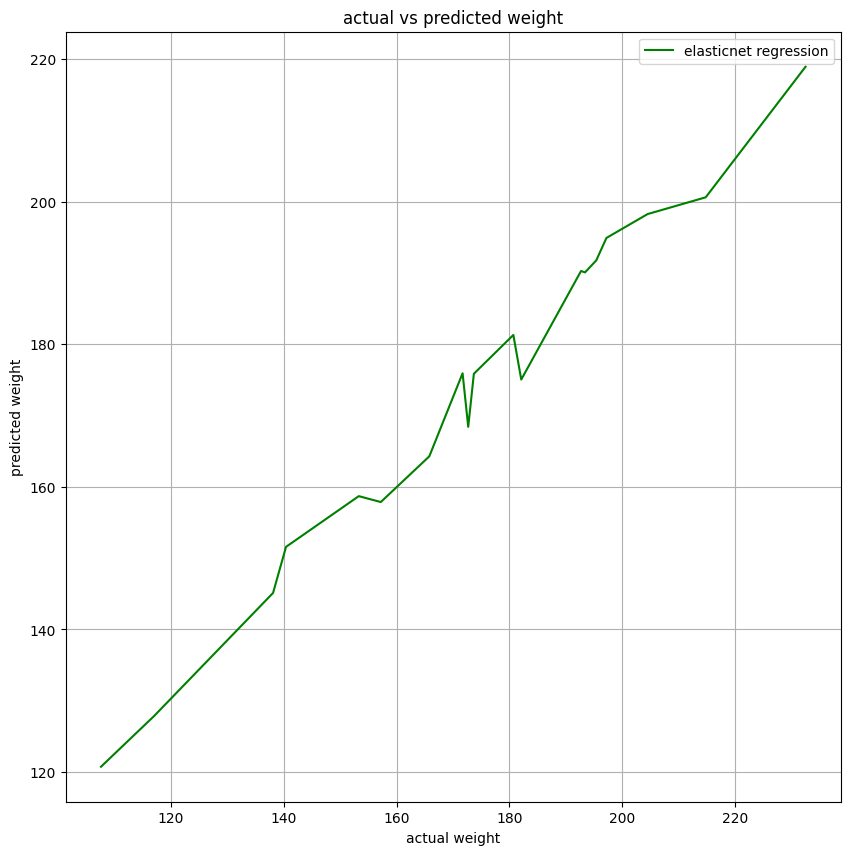

In [40]:
e=ElasticNet()
e.fit(x_train,y_train)
y_pred3=e.predict(x_test)
print(f'r2 score of elastic net is {r2_score(y_test,y_pred3)}')
print(f'mean absolute error of elastic net is {mean_absolute_error(y_test,y_pred3)}')
print(f'mean squared error of elastic net is {mean_squared_error(y_test,y_pred3)}')
print(f'root mean squared error of elastic net is {np.sqrt(mean_squared_error(y_test,y_pred3))}')
print(f'accuracy of elastic net is {e.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred3,ci=None,color='green')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['elasticnet regression'])
plt.grid(True)
plt.show()

r2 score of decision tree is 0.9460745513323979
mean absolute error of decision tree is 6.067918660287081
mean squared error of decision tree is 53.06973694269245
root mean squared error of decision tree is 7.284897867691245
accuracy of decision tree is 0.9460745513323979


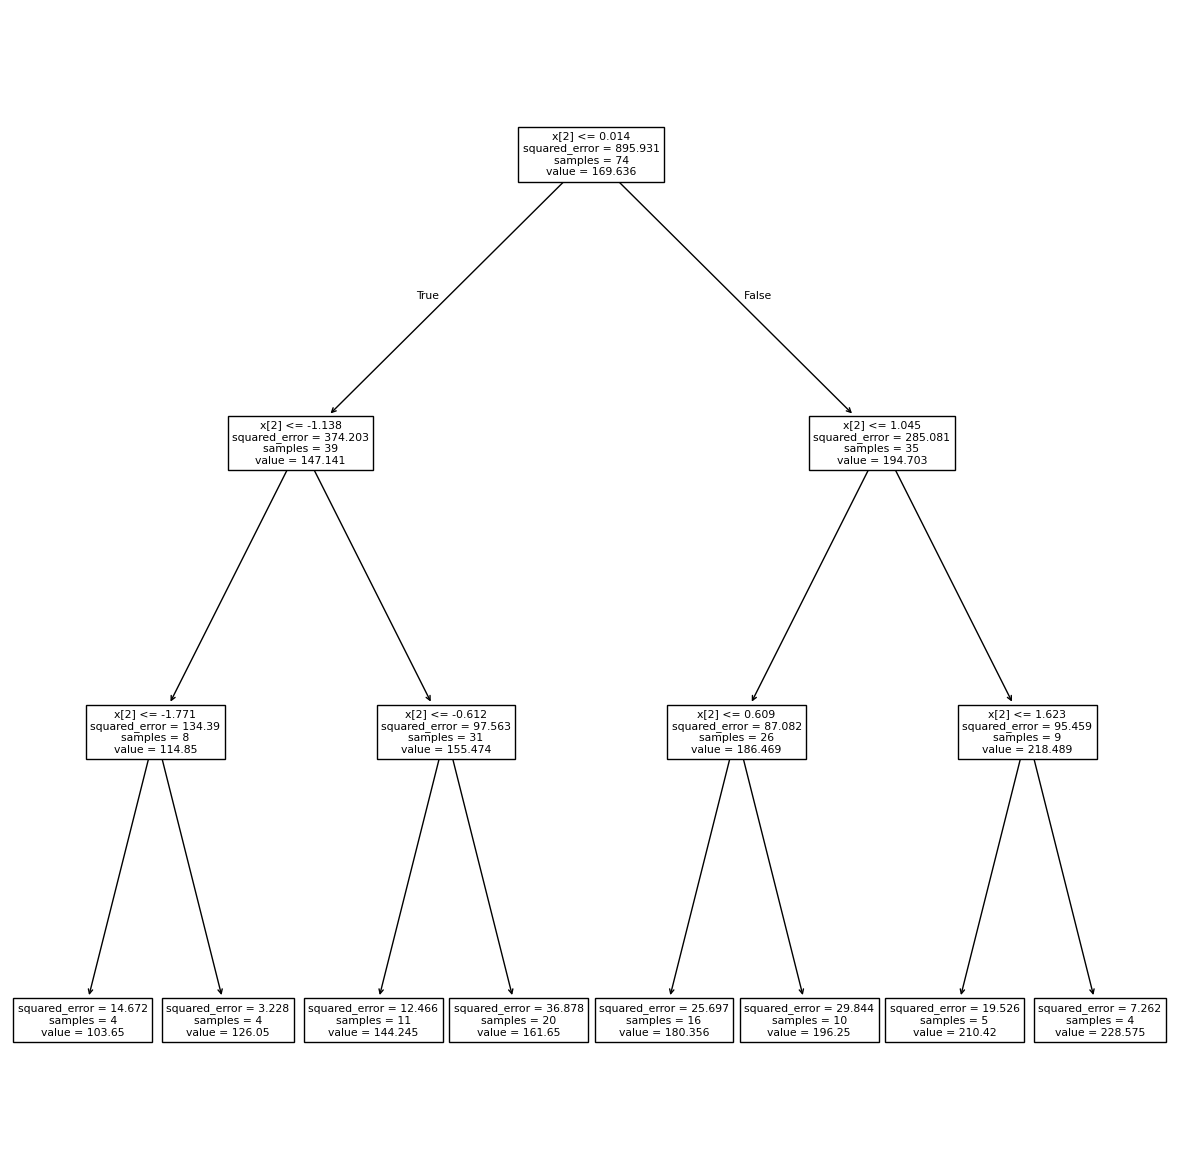

In [27]:
d=DecisionTreeRegressor(max_depth=3)
d.fit(x_train,y_train)
y_pred4=d.predict(x_test)
print(f'r2 score of decision tree is {r2_score(y_test,y_pred4)}')
print(f'mean absolute error of decision tree is {mean_absolute_error(y_test,y_pred4)}')
print(f'mean squared error of decision tree is {mean_squared_error(y_test,y_pred4)}')
print(f'root mean squared error of decision tree is {np.sqrt(mean_squared_error(y_test,y_pred4))}')
print(f'accuracy of decision tree is {d.score(x_test,y_test)}')
plt.figure(figsize=(15,15))
plot_tree(d)
plt.show()

r2 score of random forest is 0.9551717830307246
mean absolute error of random forest is 5.439736842105235
mean squared error of random forest is 44.1168639473682
root mean squared error of random forest is 6.6420526908003525
accuracy of random forest is 0.9551717830307246


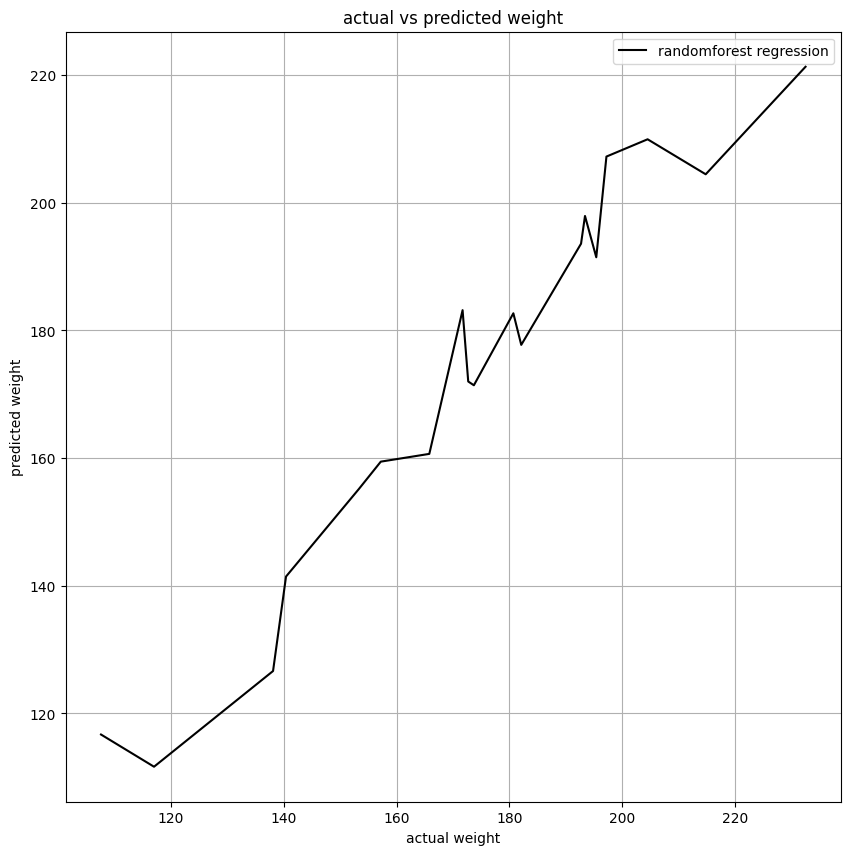

In [46]:
rf=RandomForestRegressor(max_features=6)
rf.fit(x_train,y_train)
y_pred5=rf.predict(x_test)
print(f'r2 score of random forest is {r2_score(y_test,y_pred5)}')
print(f'mean absolute error of random forest is {mean_absolute_error(y_test,y_pred5)}')
print(f'mean squared error of random forest is {mean_squared_error(y_test,y_pred5)}')
print(f'root mean squared error of random forest is {np.sqrt(mean_squared_error(y_test,y_pred5))}')
print(f'accuracy of random forest is {rf.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred5,ci=None,color='black')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['randomforest regression'])
plt.grid(True)
plt.show()


r2 score of support vector machine is 0.17302481049333718
mean absolute error of support vector machine is 22.39584392631497
mean squared error of support vector machine is 813.8523989994912
root mean squared error of support vector machine is 28.52809841190771
accuracy of support vector machine is 0.17302481049333718


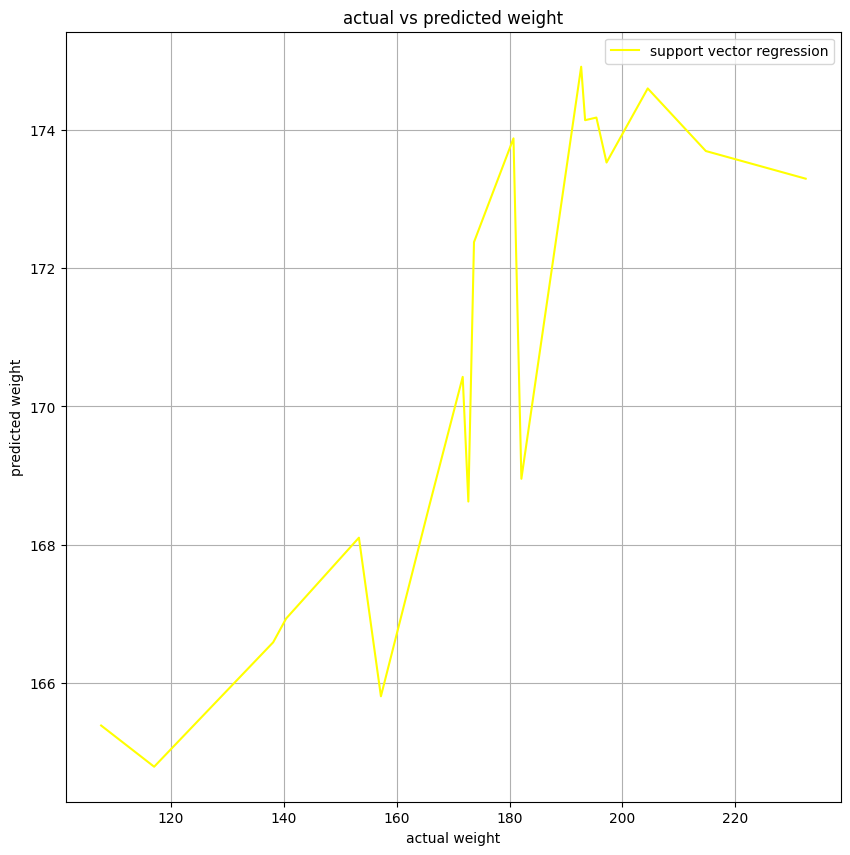

In [47]:
s=SVR()
s.fit(x_train,y_train)
y_pred6=s.predict(x_test)
print(f'r2 score of support vector machine is {r2_score(y_test,y_pred6)}')
print(f'mean absolute error of support vector machine is {mean_absolute_error(y_test,y_pred6)}')
print(f'mean squared error of support vector machine is {mean_squared_error(y_test,y_pred6)}')
print(f'root mean squared error of support vector machine is {np.sqrt(mean_squared_error(y_test,y_pred6))}')
print(f'accuracy of support vector machine is {s.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred6,ci=None,color='yellow')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['support vector regression'])
plt.grid(True)
plt.show()

r2 score of k nearest neighbors is 0.7886952001497447
mean absolute error of k nearest neighbors is 11.921052631578945
mean squared error of k nearest neighbors is 207.95172631578944
root mean squared error of k nearest neighbors is 14.420531415859454
accuracy of k nearest neighbors is 0.7886952001497447


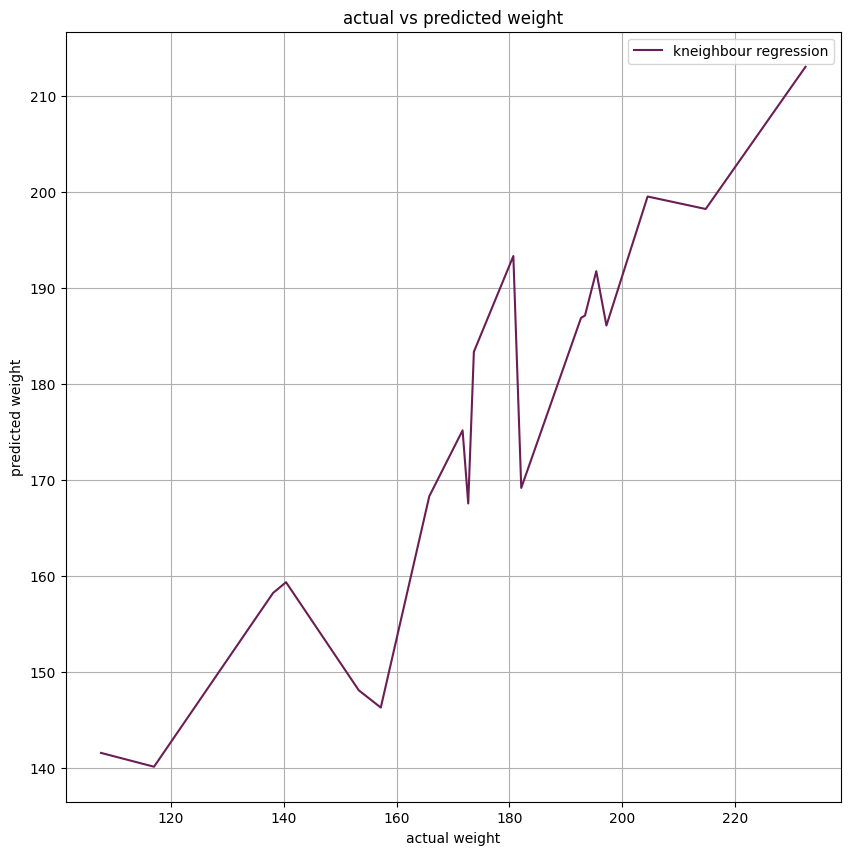

In [50]:
k=KNeighborsRegressor()
k.fit(x_train,y_train)
y_pred7=k.predict(x_test)
print(f'r2 score of k nearest neighbors is {r2_score(y_test,y_pred7)}')
print(f'mean absolute error of k nearest neighbors is {mean_absolute_error(y_test,y_pred7)}')
print(f'mean squared error of k nearest neighbors is {mean_squared_error(y_test,y_pred7)}')
print(f'root mean squared error of k nearest neighbors is {np.sqrt(mean_squared_error(y_test,y_pred7))}')
print(f'accuracy of k nearest neighbors is {k.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test,y=y_pred7,ci=None,color='#6A1E55')
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title('actual vs predicted weight')
plt.legend(['kneighbour regression'])
plt.grid(True)
plt.show()